In [1]:
!git clone https://github.com/balajisrinivas/Face-Mask-Detection

Cloning into 'Face-Mask-Detection'...
remote: Enumerating objects: 3764, done.
remote: Total 3764 (delta 0), reused 0 (delta 0), pack-reused 3764
Receiving objects: 100% (3764/3764), 143.05 MiB | 29.97 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (3840/3840), done.


In [2]:
!git clone https://github.com/keyurr2/face-detection

Cloning into 'face-detection'...
remote: Enumerating objects: 21, done.
remote: Total 21 (delta 0), reused 0 (delta 0), pack-reused 21
Unpacking objects: 100% (21/21), done.


In [3]:
# import the necessary packages
import os
import cv2
import glob as gb
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense, Activation ,Conv2D,Flatten,MaxPool2D,Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam ,SGD
import numpy as np

In [4]:

trainPath = "/content/Face-Mask-Detection/dataset"
classesf = r"/content/face-detection/deploy.prototxt.txt"
weights = r"/content/face-detection/res10_300x300_ssd_iter_140000.caffemodel"


In [5]:
data = []
labels = []
path = []
extension = 'jpg'

In [6]:
faceNet = cv2.dnn.readNetFromCaffe(classesf, weights)

In [7]:
# faceNet model
def faceNet_model(image):
  blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,(300, 300), (104.0, 177.0, 123.0))
  faceNet.setInput(blob)
  return faceNet.forward() #get_output_layers(net)


In [ ]:
# add images to list
def add_image(image,folder):
    data.append(image)
    labels.append(folder)


In [8]:
# detect faces
def detect_faces(image, folder, h, w):
  face = None
  detections  = faceNet_model(image)
  for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    #conf = detections[0, 0, 0, 2]
    #if conf > 0.6:
    #print("-*-*-*-*-*-*-*-*-")
    if confidence > 0.5:
      box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
      (startX, startY, endX, endY) = box.astype("int")

      try:
        face = image[startY:endY, startX:endX]
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        face = cv2.resize(face, (128, 128))
        # update the data and labels lists,
        add_image(face,folder)


      except:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (128, 128))
        # update the data and labels lists,
        add_image(image,folder)
        return
  detections = None




In [9]:
#Open Folders
#now let's first check the dataset folder to have a look to its content
for folder in  os.listdir(trainPath) :
    file_list = []
    file_list.extend(gb.glob(pathname= str( trainPath +'//' + folder + '/*.' + extension)))
    print(f'For training data , found {len(file_list)} in folder {folder}')
        
    for imagePath in file_list:
        # extract the class label from the filename
        label = imagePath.split(os.path.sep)[-2]
        # load the image, swap color channels, and resize it to be a fixed
        # 224x224 pixels while ignoring aspect ratio
        image = cv2.imread(imagePath)
        (Height, Width) = image.shape[:2]

        # detect faces
        detect_faces(image, folder, Height, Width)

with_mask
For training data , found 1784 in folder with_mask
(763, 714, 3)
(463, 355, 3)
(108, 85, 3)
(116, 84, 3)
(114, 106, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(936, 630, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(511, 531, 3)
(512, 385, 3)
(264, 200, 3)
(301, 191, 3)
(286, 186, 3)
(290, 193, 3)
(23, 11, 3)
(572, 459, 3)
(411, 434, 3)
(0, 0, 3)
(47, 40, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(105, 79, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(460, 392, 3)
(551, 476, 3)
(0, 0, 3)
(0, 0, 3)
(146, 96, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(108, 87, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(64, 54, 3)
(0, 0, 3)
(0, 0, 3)
(139, 100, 3)
(0, 0, 3)
(0, 0, 3)
(245, 180, 3)
(262, 230, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(115, 74, 3)
(0, 0, 3)
(0, 0, 3)
(245, 216, 3)
(0, 0, 3)
(0, 0, 3)
(0, 0, 3)
(1096, 746, 3)
(0, 0, 3)
(63, 46, 3)
(0, 0, 3)
(0, 0, 3)
(103, 80, 3)
(0, 0, 3)
(102, 82, 3)
(0, 0, 3)
(244, 149,

In [10]:
print(len(data))

4589


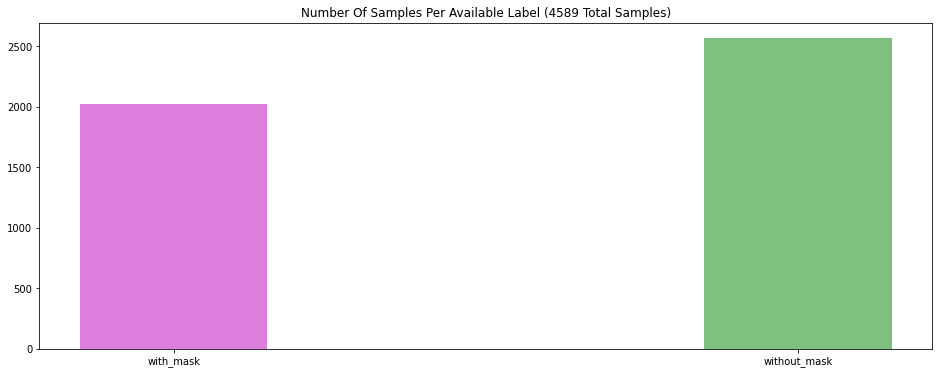

In [11]:
# Plot a bar with numbers of each class
fig = plt.figure(figsize=(16, 6))
keys = Counter(labels).keys() # equals to list(set(words))
values = Counter(labels).values() # counts the elements' frequency
plt.bar(keys,values,width=0.3,color=['m', 'g'],alpha=.5)
plt.title('Number Of Samples Per Available Label ({0:d} Total Samples)'.
          format(len(labels)))
plt.show() 

In [16]:
# The numbers of each class on two datasets.
values = list(Counter(labels).values())
print(values)


[2023, 2566]


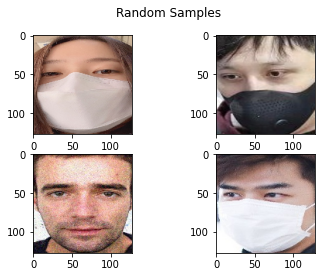

In [19]:
#random sample
# Build a 2 x 2 figure
rows, columns = 2, 2
fig, axes = plt.subplots(rows, columns)

# Variable used for indending through the image list


# Set figure title
fig.suptitle('Random Samples')

# Plot images
for i in range(rows):
    for j in range(columns):
        
        n = np.random.randint(0,len(labels))
        axes[i, j].imshow(data[n])
        
        
plt.show()

In [20]:
#normalizing data
data = np.array(data) / 255.0
labels = np.array(labels)

In [21]:
print(data.shape)
print(labels.shape)

(4589, 128, 128, 3)
(4589,)


In [22]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [23]:
print(labels.shape)

(4589, 1)


In [24]:
labels = to_categorical(labels,num_classes=2)
print(labels.shape)

(4589, 2)


In [25]:
# partition the data into training and testing splits using 85% of
# the data for training and the remaining 15% for testing

(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.15, stratify=labels, random_state=42)

In [26]:
# freeing memory
data = labels = path = faceNet  = None

## CNN model

In [27]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3  #learning rate
EPOCHS = 8     #number of iterations
BS = 64     #batch size

In [28]:
# Creating a Sequential model

model= Sequential()

model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(filters=64,kernel_size = (3,3),activation='relu'))
model.add(Conv2D(filters=128,kernel_size = (3,3),activation='relu'))

model.add(MaxPool2D((2,2)))

model.add(Flatten())

#model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(48,activation='relu'))
model.add(Dropout(.5))

#output
model.add(Dense(2,activation='softmax')) 

In [29]:
# compile model
#opt = SGD(lr=INIT_LR)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) #optimizer='Adam',optimizer=opt

In [30]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 122, 122, 128)     73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 476288)            0         
                                                                 
 dense (Dense)               (None, 64)                30482496  
                                                        

In [31]:
# train the network
print("[INFO] training network...")
H = model.fit(x=trainX,y=trainY,
          validation_data=(testX,testY),
          batch_size=BS,
          epochs=EPOCHS,
          callbacks=[es],)

Epoch 1/8
61/61 [==============================] - 40s 445ms/step - loss: 0.7407 - accuracy: 0.8056 - val_loss: 0.2202 - val_accuracy: 0.9231
Epoch 2/8
61/61 [==============================] - 21s 341ms/step - loss: 0.2078 - accuracy: 0.9333 - val_loss: 0.1885 - val_accuracy: 0.9332
Epoch 3/8
61/61 [==============================] - 21s 340ms/step - loss: 0.1863 - accuracy: 0.9372 - val_loss: 0.1666 - val_accuracy: 0.9434
Epoch 4/8
61/61 [==============================] - 21s 341ms/step - loss: 0.1604 - accuracy: 0.9490 - val_loss: 0.2134 - val_accuracy: 0.9318
Epoch 5/8
61/61 [==============================] - 21s 340ms/step - loss: 0.1289 - accuracy: 0.9574 - val_loss: 0.1724 - val_accuracy: 0.9463
Epoch 6/8
61/61 [==============================] - 21s 339ms/step - loss: 0.1141 - accuracy: 0.9669 - val_loss: 0.1677 - val_accuracy: 0.9463
Epoch 7/8
61/61 [==============================] - 21s 340ms/step - loss: 0.0715 - accuracy: 0.9779 - val_loss: 0.1751 - val_accuracy: 0.9594
Epoch 

In [32]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
#print(lb.classes_)
#target_names=list(map(str,lb.classes_))
#print(target_names)
print(classification_report(testY.argmax(axis=1), predIdxs,target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

   with_mask       0.95      0.92      0.93       304
without_mask       0.94      0.96      0.95       385

    accuracy                           0.94       689
   macro avg       0.94      0.94      0.94       689
weighted avg       0.94      0.94      0.94       689



In [33]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
#total = sum(sum(cm))
#acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.2f}".format(np.trace(cm)/sum(sum(cm))))
print("sensitivity: {:.2f}".format(sensitivity))
print("specificity: {:.2f}".format(specificity))

[[280  24]
 [ 15 370]]
acc: 0.94
sensitivity: 0.92
specificity: 0.96


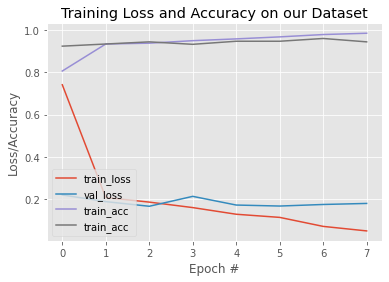

In [34]:
# plot the training loss and accuracy
N = 8
#N = es.stopped_epoch +1
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="train_acc")

plt.title("Training Loss and Accuracy on our Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [36]:
# save the model
model.save("_model.h5")

## Making predictions on new data

In [37]:
reconstructed_model = load_model("_model.h5")

In [38]:
faceNet = cv2.dnn.readNetFromCaffe(classesf, weights)

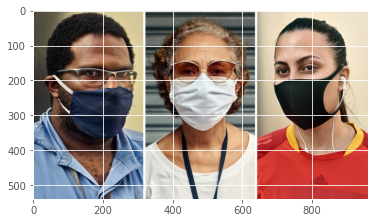

In [39]:
test = "/content/test2.jpg"
image = cv2.imread(test)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

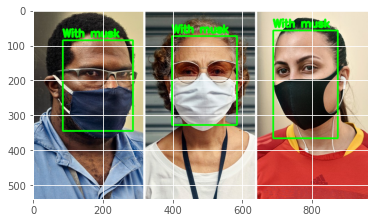

In [40]:

face = None
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,(300, 300), (104.0, 177.0, 123.0))
faceNet.setInput(blob)
detections  = faceNet.forward() #get_output_layers(net)
for i in range(0, detections.shape[2]):
  confidence = detections[0, 0, i, 2]
  if confidence > 0.5:
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")
    y = startY - 10 if startY - 10 > 10 else startY + 10
    face = image[startY:endY, startX:endX]
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face = cv2.resize(face, (128, 128))
    face = np.array(face) / 255.0
    face = np.expand_dims(face, axis=0) #convert (128, 128, 3) to (1, 128, 128, 3)
    predIdxs = model.predict(face)
    predIdxs = np.argmax(predIdxs, axis=1)
    if predIdxs[0] == 1:
      cv2.rectangle(image, (startX, startY), (endX, endY),(0, 0, 255), 4)
      cv2.putText(image, "Without musk", (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 5)
    else:
      cv2.rectangle(image, (startX, startY), (endX, endY),(0, 255, 0), 4)
      cv2.putText(image, "With musk", (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 5)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

